In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import syllables
import re
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('../Data/train.csv')

In [4]:
excerpts = df['excerpt']

In [5]:
i = 0
excerptData = {}
for entry in excerpts:
    count = 0
    excerptData[i] = [len(entry.split()), len(re.split(r'\.!?', entry))]
    for word in entry.split():
        word = word.strip(',.')
        if (syllables.estimate(word) >= 3) and ((not word.endswith('ed')) or (not word.endswith('ing')) or (not word.endswith('es'))):
            count += 1
    excerptData[i].append(count)
    i += 1
        

In [6]:
def GunningFog(words, sentences, complexWords):
    
    return (.4*((words/sentences) + 100*(complexWords/words)))

In [7]:
for i in range(len(excerptData)):
    excerptData[i].append(GunningFog(*excerptData[i]))

In [8]:
excerptData = np.array(list(excerptData.values()))

In [9]:
targetValues = np.array(df['target'])
gunningFog = excerptData[:, 3].reshape(-1,1)

In [10]:
reg = LinearRegression().fit(gunningFog, targetValues)

In [11]:
predictions = reg.predict(gunningFog)

Text(0, 0.5, 'Target Values')

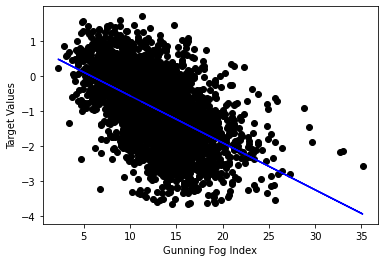

In [12]:
plt.scatter(excerptData[:, 3], targetValues, color = 'black')
plt.plot(excerptData[:, 3], predictions, color = 'blue')
plt.xlabel("Gunning Fog Index")
plt.ylabel("Target Values")

In [13]:
mean_squared_error(targetValues,predictions, squared = False)

0.8734839815296762

In [14]:
r2_score(targetValues, predictions)

0.2855437525361644

In [15]:
scores = cross_val_score(reg, gunningFog, targetValues, scoring="neg_root_mean_squared_error", cv=10)
scores = - scores

In [16]:
scores, scores.mean(), scores.std()

(array([0.77110012, 0.85592681, 0.94437747, 0.89865421, 0.90894087,
        0.96510534, 1.01305319, 0.86942087, 0.69226325, 0.88588643]),
 0.8804728550985612,
 0.08837658320452584)